Aqui, farei um pequeno treino do <a hrf=DeepLearning/01_Pytorch_Workflow_fundamentals.ipynb>Tópico anterior</a>, por isso, irei:

- criar o modelo
- treina-lo com o loop
- salva-lo

## Importando bibliotecas



In [35]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import os

## Setando o local de treinamento do Modelo(CPU/GPU)

In [36]:
# Isso faz algumas checagens para selecionar o local de treinamento da IA

if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

print(f"use: {device}")

use: cuda


## Criando os banco de dados para o treino

In [37]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias 
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Separando dados de treino e teste

In [38]:
tamanho_do_teste = int(0.8 * len(X))

X_train, y_train = X[:tamanho_do_teste] , y[:tamanho_do_teste]
X_test, y_test   = X[tamanho_do_teste:] , y[tamanho_do_teste:]

X_train, y_train, X_test, y_test

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

## Plotagem do gráfico

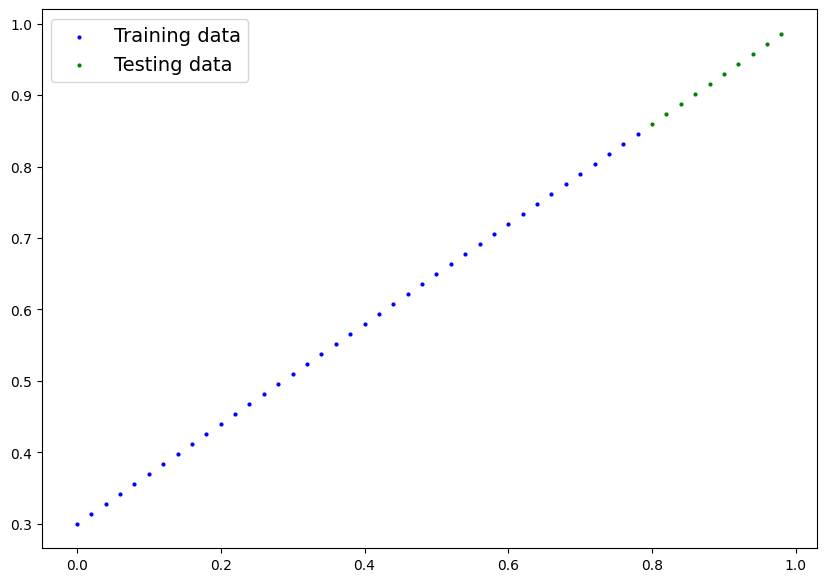

In [39]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    # Função para ajudar na vizualização dos dados, plota um gráfico utilizando Matplotlib

    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data") # Plot training data in blue
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")    # Plot test data in green

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")   # Plot the predictions in red (predictions were made on the test data)

    plt.legend(prop={"size": 14}) # Show the legend


# Plotando o gráfico utilizando a função plot_predictions
plot_predictions(X_train, y_train, X_test, y_test)

## Construindo o modelo

In [40]:
# Classe que define o modelo
class LinearRegressionModellv2(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [41]:
# setando a seed
torch.manual_seed(42)

# instanciando modelo
modelo = LinearRegressionModellv2() # modelo é instanciado na CPU

# Movendo modelo para GPU
modelo = modelo.to(device)

next(modelo.parameters()).device

device(type='cuda', index=0)

## Treinamento
- Função de perda
- Optmizer

In [42]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=modelo.parameters(),
                           lr=0.001)

In [43]:
# Ciclo de treino

# Defino a quantidade de treinamentos
EPOCA = 2000

# Passar todos os dados para a GPU
X_train = X_train.to(device)
X_test  = X_test.to(device)
y_train = y_train.to(device)
y_test  = y_test.to(device)

# Listas utilizadas na visualização
train_loss_values = []
test_loss_values = []
epoch_count = range(EPOCA)

for epoch in range(EPOCA):
    # Seta o modelo no modo treino
    modelo.train()

    # 1 - Forward - passar por cada um dos elementos
    y_pred = modelo(X_train)

    # 2 - Calcula perda
    loss = loss_fn(y_pred, y_train)

    # 3 - Zera gradientes
    optimizer.zero_grad()

    # 4 - calcula a perda para modificar o optimizer
    loss.backward()

    # 5 - atualiza o optimizer
    optimizer.step()

    # Colocando o modelo no modo de inferencia
    modelo.eval()

    with torch.inference_mode():
        # Passa por cada elemento no teste
        test_pred = modelo(X_test)
        
        # Calcula perda
        test_loss = loss_fn(test_pred, y_test)
        
        # Adiciona nas listas
        train_loss_values.append(loss.detach().cpu().item())  
        test_loss_values.append(test_loss.detach().cpu().item())



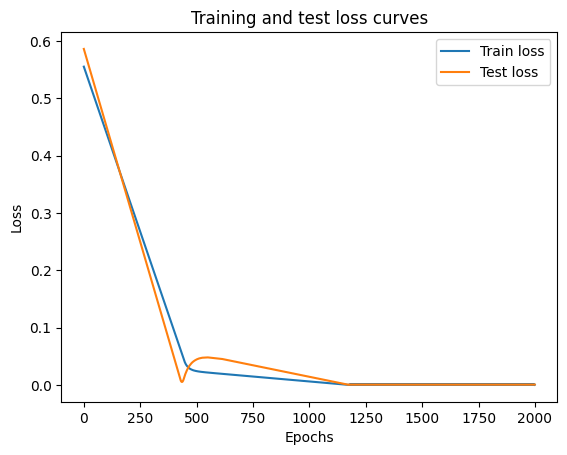

In [44]:
# Plotando a curva de perda
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Fazendo previsões

Observe que o modelo está fazendo exatamente o esperado  após 2000 épocas

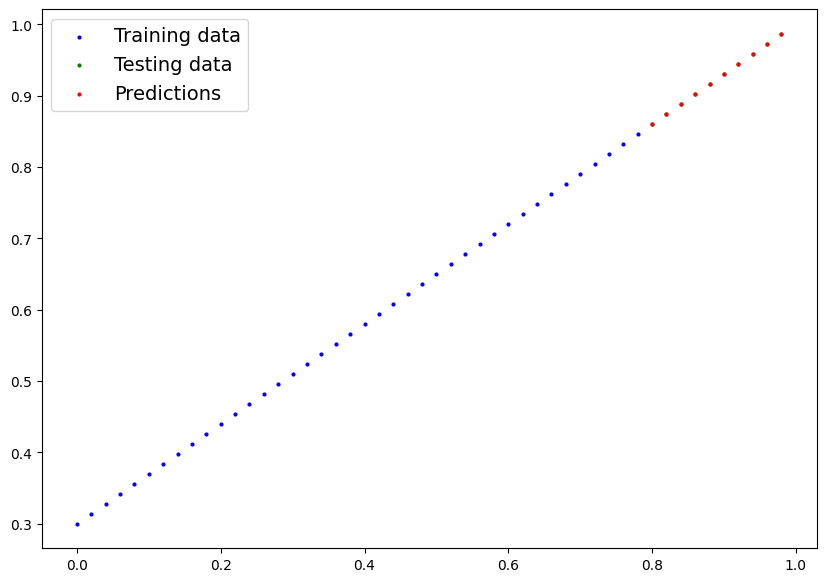

In [45]:
modelo.eval()

with torch.inference_mode():
    y_preds = modelo(X_test)

plot_predictions(predictions=y_preds.cpu())

## Salvando e carregando o modelo

In [46]:
# Setando o local de armazenamento do modelo
caminho = "01.1_Modelo2.pth"

# Pegando apenas o dicionário dos parâmetros do modelo
salvar = modelo.state_dict()

# Salvando o modelo
torch.save(salvar, caminho)

In [51]:
# Carregando o Modelo
modelo_carregado = LinearRegressionModellv2()
modelo_carregado.load_state_dict(torch.load(caminho))
modelo_carregado.to(device)

print(f"Modelo Carregado:{modelo_carregado}\n")
print(f"Dispositivo do modelo:{next(modelo_carregado.parameters()).device}") # Se sair cuda, está na GPU

Modelo Carregado:LinearRegressionModellv2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

Dispositivo do modelo:cuda:0
